<style>
.toc {
  font-family: Avenir;
  font-size: 20px;
}
</style>
<div style="text-align:center;">
  <h1>Capital Bikeshare Rebalance</h1>
  <h3>Amanda Chen</h3>
</div> 
<br>


<style>.toc {font-family: Avenir;font-size: 16px;}</style>
<h2>Table of Contents<span class="tocSkip"></span></h2>
<br>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="## Exordium" data-toc-modified-id="Exordium-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exordium</a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Packages" data-toc-modified-id="Packages-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Packages</a>
                    </span>
           </li>
                <li>
                    <span>
                        <a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#Random-seed" data-toc-modified-id="Random-seed-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Random seed</a>
                    </span>
                </li>
           </ul>
        </li>
        <li>
            <span>
                <a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Data-Description" data-toc-modified-id="Data-Description-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Description</a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#Loading-Capital-Bikeshare-Data" data-toc-modified-id="Loading-Capital-Bikeshare-Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Loading Capital Bikeshare Data</a>
                    </span>
                </li>
                <li>
            <span>
                <a href="#Feature-Engineering-Dealing-with-time-and-date" data-toc-modified-id="Feature-Engineering-Dealing-with-time-and-date-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Feature Engineering - Dealing with time and date</a>
                </span>
        </li>
        <li>
              <span>
          <a href="#Check-weather-data" data-toc-modified-id="Check-weather-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Check weather data</a>
                    </span>
                </li>
                <li>
                     <span>
          <a href="#Check-missing-values" data-toc-modified-id="Check-missing-values-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Check missing values</a>
                    </span>
                </li>
                <li>
                     <span>
          <a href="#Drop-variables-of-choice" data-toc-modified-id="Drop-variables-of-choice-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Drop variables of choice</a>
                       </span>
                </li>
           </ul>
        </li>
        <li>
            <span>
                <a href="#Exploratory-analysis" data-toc-modified-id="Exploratory-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory analysis</a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Prepare-X-and-y" data-toc-modified-id="Prepare-X-and-y-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Prepare X and y</a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Models-selections-by-comparing-the-performances-between-Linear,Ridge,LASSO,Elastic-Net,KNN" data-toc-modified-id="Models-selections-by-comparing-the-performances-between-Linear,-Ridge,-LASSO,-Elastic-Net,-KNN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Models selections by comparing the performances between Linear, Ridge, LASSO, Elastic Net, KNN</a>
          </span>
        </li>
        <li>
            <span>
                <a href="#Model-selection" data-toc-modified-id="Model-selection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model selection</a>
            </span>
          </li>
        <li>
            <span>
                <a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a>
            </span>
                         

# Exordium 

### Explore the relationship between the demand for the Bikeshare station near my school and the weather in Spring 2022, and whether there is a need for bike allocation.

# Notebook Configuration

### Packages

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

### Warning

In [377]:
import warnings

#Supressing warnings
warnings.filterwarnings('ignore')

### Random Seed

In [378]:
#Select random seed
random_seed = 1234

#Set random seed
np.random.seed(random_seed)

# Data Preprocessing

### Data Description

<table>
    <tr>
        <th>Features</th>
        <th></th>
    </tr>
    <tr>
        <td>ride_id</td>
        <td>Bike number</td>
    </tr>
    <tr>
        <td>rideable_type</td>
        <td>The types of bike, including classic_bike, electric_bike, docked_bike</td>
    </tr>
    <tr>
        <td>started_at</td>
        <td>Includes start date and time</td>
    </tr>
    <tr>
        <td>ended_at</td>
        <td>Includes end date and time</td>
    </tr>
    <tr>
        <td>start_station_name</td>
        <td>Starting station name</td>
    </tr>
    <tr>
        <td>start_station_id</td>
        <td>Starting station number</td>
    </tr>
    <tr>
        <td>end_station_name</td>
        <td>Ending station name</td>
    </tr>
    <tr>
        <td>end_station_id</td>
        <td>Ending station number</td>
    </tr>
    <tr>
        <td>start_lat</td>
        <td>Starting station latitude</td>
    </tr>
    <tr>
        <td>start_lng</td>
        <td>Starting station longitude</td>
    </tr>
    <tr>
        <td>end_lat</td>
        <td>Ending station latitude</td>
    </tr>
    <tr>
        <td>end_lng</td>
        <td>Ending station longitude</td>
    </tr>
    <tr>
        <td>member_casual</td>
        <td>Indicates whether user was a "registered" member (Annual Member, 30-Day Member or Day Key Member) or a "casual" rider (Single Trip, 24-Hour Pass, 3-Day Pass or 5-Day Pass)</td>
    </tr>
    <tr>
</table>


### Loading Capital Bikeshare Data
https://ride.capitalbikeshare.com/system-data

I examined data from Jan to Apr in 2022

### Unzip and read files

In [379]:
import glob
import zipfile

In [380]:
files = glob.glob('20220*-capitalbikeshare-tripdata.zip')
files

['202201-capitalbikeshare-tripdata.zip',
 '202204-capitalbikeshare-tripdata.zip',
 '202203-capitalbikeshare-tripdata.zip',
 '202202-capitalbikeshare-tripdata.zip']

In [381]:
for file in files:
    print('Unzipping:',file)

    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall()

Unzipping: 202201-capitalbikeshare-tripdata.zip
Unzipping: 202204-capitalbikeshare-tripdata.zip
Unzipping: 202203-capitalbikeshare-tripdata.zip
Unzipping: 202202-capitalbikeshare-tripdata.zip


In [382]:
#read csv files
df_Jan=pd.read_csv('202201-capitalbikeshare-tripdata.csv')
df_Feb=pd.read_csv('202202-capitalbikeshare-tripdata.csv')
df_Mar=pd.read_csv('202203-capitalbikeshare-tripdata.csv')
df_Apr=pd.read_csv('202204-capitalbikeshare-tripdata.csv')

In [383]:
#concat data
bikeshare = pd.concat([df_Jan,df_Feb,df_Mar,df_Apr])
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828621 entries, 0 to 310434
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             828621 non-null  object 
 1   rideable_type       828621 non-null  object 
 2   started_at          828621 non-null  object 
 3   ended_at            828621 non-null  object 
 4   start_station_name  792027 non-null  object 
 5   start_station_id    792027 non-null  float64
 6   end_station_name    786251 non-null  object 
 7   end_station_id      786251 non-null  float64
 8   start_lat           828621 non-null  float64
 9   start_lng           828621 non-null  float64
 10  end_lat             827170 non-null  float64
 11  end_lng             827170 non-null  float64
 12  member_casual       828621 non-null  object 
dtypes: float64(6), object(7)
memory usage: 88.5+ MB


In [384]:
bikeshare.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,38.822738,-77.049265,member
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.0,10th & G St NW,31274.0,38.903658,-77.031737,38.898243,-77.026235,member
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.0,12th & L St NW,31251.0,38.903658,-77.031737,38.903819,-77.028400,member


In [385]:
bikeshare.shape

(828621, 13)

In [386]:
bikeshare.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,792027.000000,786251.000000,828621.000000,828621.000000,827170.000000,827170.000000
mean,31364.764585,31366.289532,38.902906,-77.031119,38.901295,-77.029709
std,245.616061,244.244352,0.024954,0.030723,0.150201,0.294969
min,31000.000000,31000.000000,38.780000,-77.370000,0.000000,-77.410000
25%,31213.000000,31215.000000,38.890539,-77.044600,38.890496,-77.044600
50%,31277.000000,31275.000000,38.902674,-77.031737,38.902061,-77.031686
75%,31604.000000,31605.000000,38.912729,-77.013769,38.912100,-77.013500
max,32901.000000,32906.000000,39.125863,-76.820000,39.130000,0.000000


### Feature Engineering - Dealing with time and date

In [387]:
#Transform time to date ONLY
bikeshare['started_at_date'] = pd.to_datetime(bikeshare['started_at']).dt.date
bikeshare['ended_at_date'] = pd.to_datetime(bikeshare['ended_at']).dt.date

In [388]:
bikeshare.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_date,ended_at_date
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,38.822738,-77.049265,member,2022-01-06,2022-01-06
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.0,10th & G St NW,31274.0,38.903658,-77.031737,38.898243,-77.026235,member,2022-01-31,2022-01-31
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.0,12th & L St NW,31251.0,38.903658,-77.031737,38.903819,-77.028400,member,2022-01-07,2022-01-07


### Check weather data

In [389]:
weather = pd.read_csv('DC Weather 2022-01-01 to 2022-12-31.csv')
weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Washington,DC,USA",2022-01-01,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,...,0.6,0,NaN,2022-01-01T07:26:53,2022-01-01T16:56:53,0.99,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,A..."
1,"Washington,DC,USA",2022-01-02,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,...,1.7,1,NaN,2022-01-02T07:27:00,2022-01-02T16:57:43,1.00,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
2,"Washington,DC,USA",2022-01-03,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,...,0.0,0,NaN,2022-01-03T07:27:05,2022-01-03T16:58:34,0.00,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,A..."
3,"Washington,DC,USA",2022-01-04,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,...,5.4,6,NaN,2022-01-04T07:27:07,2022-01-04T16:59:27,0.02,Clear,Clear conditions throughout the day.,snow,"KDCA,72405013743,72403793728,D6279,F0198,KADW,..."
4,"Washington,DC,USA",2022-01-05,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,...,2.2,1,NaN,2022-01-05T07:27:08,2022-01-05T17:00:21,0.05,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."


In [390]:
weather.shape

(365, 33)

### Check missing values

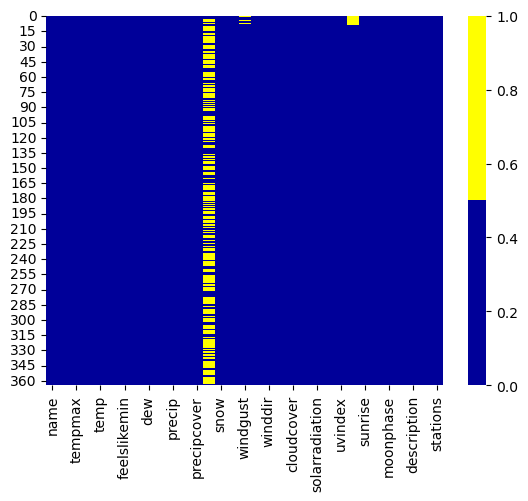

In [391]:
# Date time format 
weather['datetime'] = pd.to_datetime(weather['datetime']).dt.date

# Use sns heatmap to see whats are the null values.
coln = weather.columns[:weather.shape[1]]  
colors = ['#000099','#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(weather[coln].isnull(), cmap = sns.color_palette(colors))
plt.show()

In [392]:
pd.isnull(weather).sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          231
snow                  0
snowdepth             0
windgust              3
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk            9
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

### Drop variables of choice

In [393]:
# Drop unnecessary variables
weather_df = weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

In [394]:
weather_df.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,2022-01-01,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,...,11.4,190.2,1007.2,99.5,6.2,21.4,0.6,0,0.99,rain
1,2022-01-02,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,...,18.9,290.7,1006.6,91.6,9.6,47.3,1.7,1,1.00,rain
2,2022-01-03,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,0.889,...,22.5,358.5,1019.7,77.2,6.2,6.3,0.0,0,0.00,snow
3,2022-01-04,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,...,14.1,192.1,1029.7,18.7,9.9,153.2,5.4,6,0.02,snow
4,2022-01-05,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,...,13.6,195.2,1014.5,82.6,9.9,63.5,2.2,1,0.05,partly-cloudy-day


# Exploratory analysis

## 22nd & H St NW has 13 docks in service

### Daily pickups for 22nd & H St NW

In [395]:
#Group and get pickup occurrence for 22nd & H St NW
bikeshare_sub = bikeshare[bikeshare['start_station_name'] == "22nd & H St NW"]
bikeshare_group = bikeshare_sub.groupby(['started_at_date','start_station_name']).size()
bikeshare_Hst_pickup = bikeshare_group.reset_index(name = "pickup_count for 22nd & H St NW")
bikeshare_Hst_pickup

,started_at_date,start_station_name,pickup_count for 22nd & H St NW
0,2022-01-01,22nd & H St NW,5
1,2022-01-02,22nd & H St NW,10
2,2022-01-05,22nd & H St NW,6
3,2022-01-06,22nd & H St NW,3
4,2022-01-07,22nd & H St NW,3
...,...,...,...
112,2022-04-26,22nd & H St NW,33
113,2022-04-27,22nd & H St NW,31
114,2022-04-28,22nd & H St NW,32
115,2022-04-29,22nd & H St NW,27


### Top 10 daily pickups for 22nd & H St NW

In [396]:
bikeshare_Hst_pickup.sort_values(by = ['pickup_count for 22nd & H St NW'], ascending = False).head(10)

,started_at_date,start_station_name,pickup_count for 22nd & H St NW
108,2022-04-22,22nd & H St NW,52
99,2022-04-13,22nd & H St NW,52
111,2022-04-25,22nd & H St NW,51
77,2022-03-22,22nd & H St NW,50
116,2022-04-30,22nd & H St NW,49
102,2022-04-16,22nd & H St NW,42
98,2022-04-12,22nd & H St NW,41
81,2022-03-26,22nd & H St NW,41
100,2022-04-14,22nd & H St NW,41
57,2022-03-02,22nd & H St NW,39


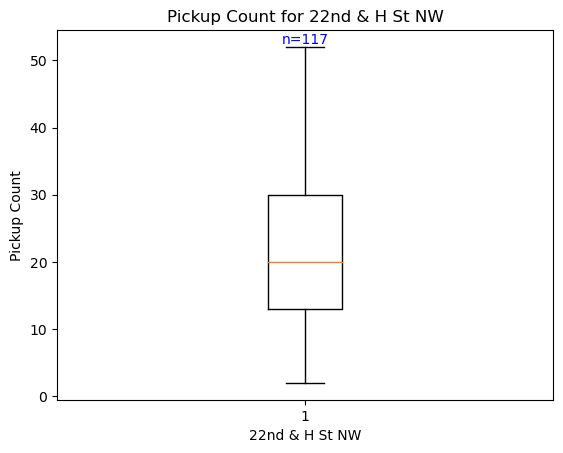

In [397]:
plt.boxplot(bikeshare_Hst_pickup['pickup_count for 22nd & H St NW'])
sample_size = len(bikeshare_Hst_pickup['pickup_count for 22nd & H St NW'])
plt.text(1, max(bikeshare_Hst_pickup['pickup_count for 22nd & H St NW']) + 0.05, f'n={sample_size}', ha='center', va='bottom', color='blue')
plt.xlabel('22nd & H St NW')
plt.ylabel('Pickup Count')
plt.title('Pickup Count for 22nd & H St NW')

plt.show()

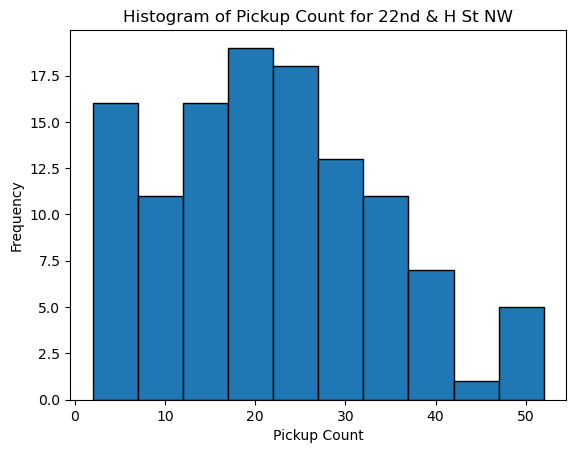

In [398]:
data = bikeshare_Hst_pickup['pickup_count for 22nd & H St NW']
plt.hist(data, bins=10, edgecolor='black')
plt.xlabel('Pickup Count')
plt.ylabel('Frequency')
plt.title('Histogram of Pickup Count for 22nd & H St NW')
plt.show()

In [399]:
bikeshare_Hst_pickup.describe()

,pickup_count for 22nd & H St NW
count,117.000000
mean,21.324786
std,12.146966
min,2.000000
25%,13.000000
50%,20.000000
75%,30.000000
max,52.000000


### Daily dropoffs for 22nd & H St NW

In [400]:
# Group and get drop off occurrence for 22nd & H St NW
bikeshare_sub = bikeshare[bikeshare['end_station_name'] == "22nd & H St NW"]
bikeshare_group = bikeshare_sub.groupby(['ended_at_date','end_station_name']).size()
bikeshare_Hst_dropoff = bikeshare_group.reset_index(name = "dropoff_count for 22nd & H St NW")
bikeshare_Hst_dropoff

,ended_at_date,end_station_name,dropoff_count for 22nd & H St NW
0,2022-01-01,22nd & H St NW,4
1,2022-01-02,22nd & H St NW,10
2,2022-01-04,22nd & H St NW,1
3,2022-01-05,22nd & H St NW,6
4,2022-01-06,22nd & H St NW,3
...,...,...,...
115,2022-04-27,22nd & H St NW,40
116,2022-04-28,22nd & H St NW,33
117,2022-04-29,22nd & H St NW,32
118,2022-04-30,22nd & H St NW,44


### Top 10 daily dropoffs for 22nd & H St NW

In [401]:
bikeshare_Hst_dropoff.sort_values(by = ['dropoff_count for 22nd & H St NW'], ascending = False).head(10)

,ended_at_date,end_station_name,dropoff_count for 22nd & H St NW
113,2022-04-25,22nd & H St NW,61
79,2022-03-22,22nd & H St NW,53
83,2022-03-26,22nd & H St NW,51
101,2022-04-13,22nd & H St NW,49
104,2022-04-16,22nd & H St NW,45
118,2022-04-30,22nd & H St NW,44
100,2022-04-12,22nd & H St NW,42
102,2022-04-14,22nd & H St NW,41
110,2022-04-22,22nd & H St NW,40
115,2022-04-27,22nd & H St NW,40


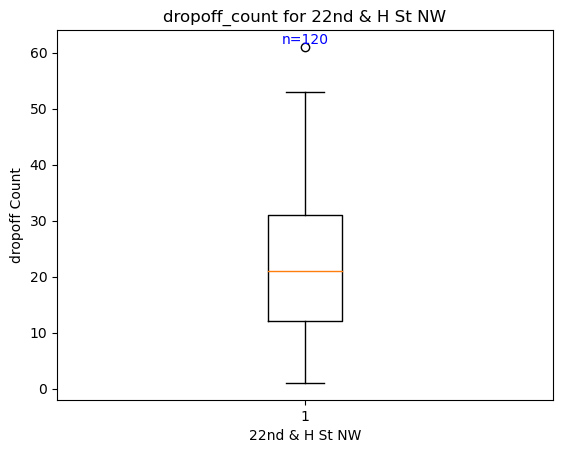

In [408]:
plt.boxplot(bikeshare_Hst_dropoff['dropoff_count for 22nd & H St NW'])
sample_size = len(bikeshare_Hst_dropoff['dropoff_count for 22nd & H St NW'])
plt.text(1, max(bikeshare_Hst_dropoff['dropoff_count for 22nd & H St NW']) + 0.05, f'n={sample_size}', ha='center', va='bottom', color='blue')
plt.xlabel('22nd & H St NW')
plt.ylabel('dropoff Count')
plt.title('dropoff_count for 22nd & H St NW')
plt.show()

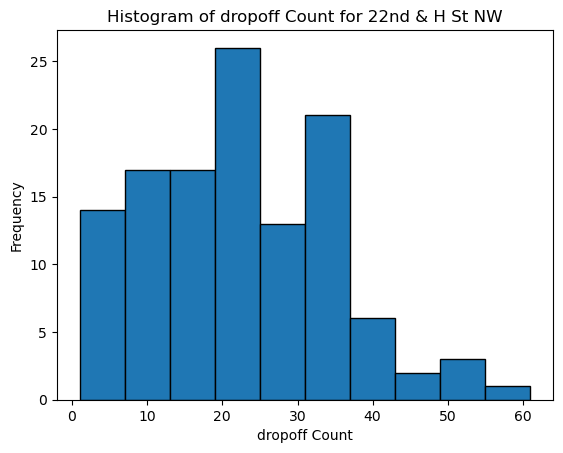

In [403]:
data = bikeshare_Hst_dropoff['dropoff_count for 22nd & H St NW']
plt.hist(data, bins=10, edgecolor='black')
plt.xlabel('dropoff Count')
plt.ylabel('Frequency')
plt.title('Histogram of dropoff Count for 22nd & H St NW')
plt.show()

In [404]:
bikeshare_Hst_dropoff.describe()

,dropoff_count for 22nd & H St NW
count,120.000000
mean,21.941667
std,12.451787
min,1.000000
25%,12.000000
50%,21.000000
75%,31.000000
max,61.000000


### Visualize pickups and dropoffs for 22nd & H St NW

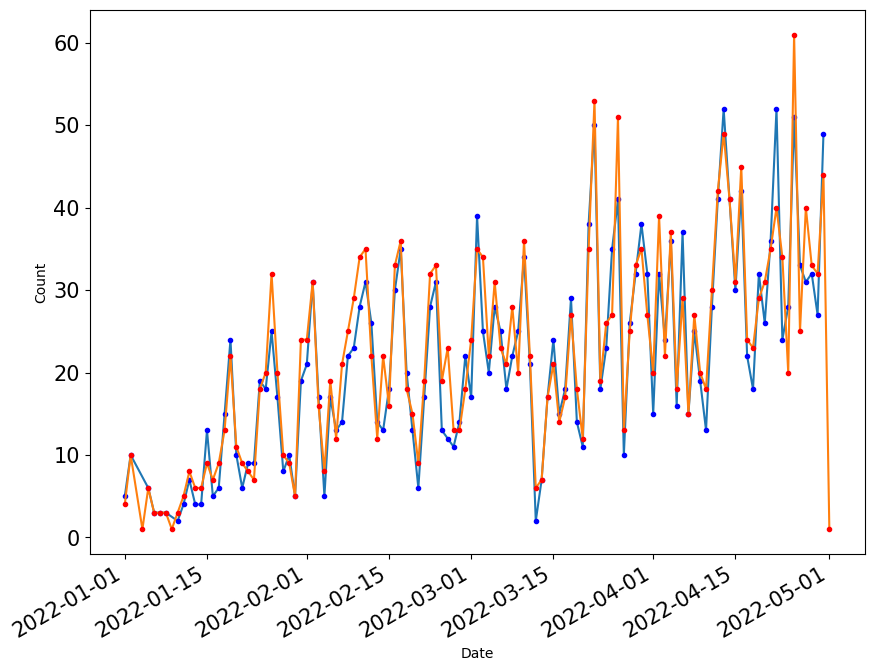

In [405]:
fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.plot_date( bikeshare_Hst_pickup['started_at_date'], bikeshare_Hst_pickup['pickup_count for 22nd & H St NW'],linestyle = 'solid',markeredgecolor = 'blue',markerfacecolor = 'blue', markersize = 3)
ax1.plot_date( bikeshare_Hst_dropoff['ended_at_date'], bikeshare_Hst_dropoff['dropoff_count for 22nd & H St NW'],linestyle = 'solid',markeredgecolor = 'red',markerfacecolor = 'red', markersize = 3)

ax1.set_xlabel('Date',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
plt.gcf().autofmt_xdate()

plt.tick_params(labelsize=15)
plt.show()  

### Check correlations between variables in the weather data 

### According to the heatmap below, dew, feelslike, feelslikemax and feelslikemin are correlated to tempmax, tempmin, and temp, but could keep for now.

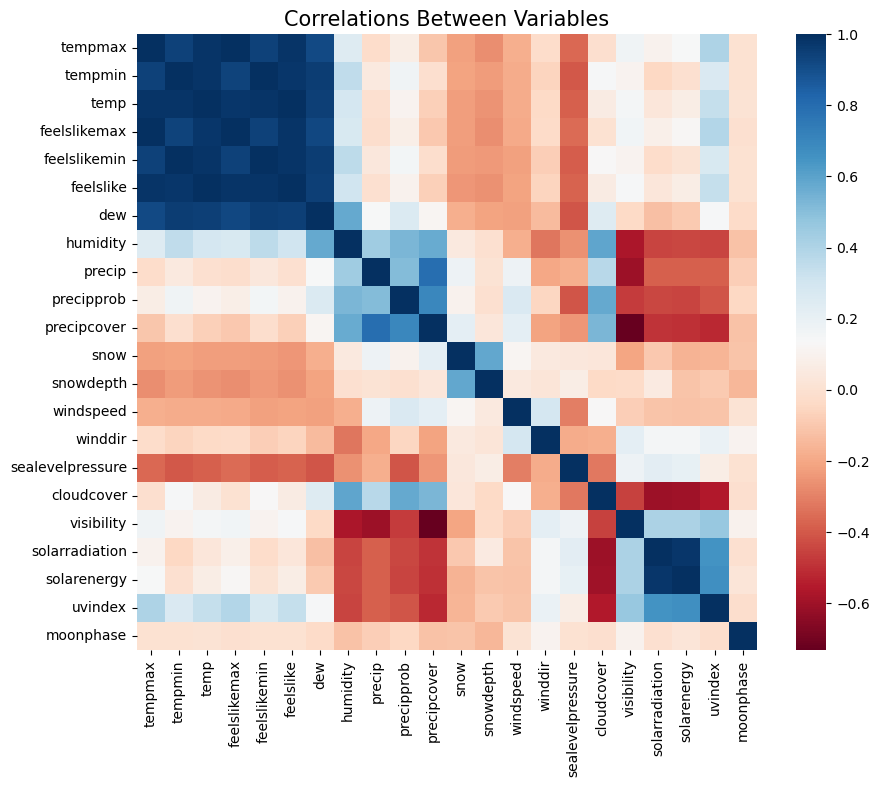

In [409]:
plt.figure(figsize=(10,8))
sns.heatmap(weather_df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

# Prepare X and y

### Merge with weather data and remove dates and station name for 22st & H St NW


In [324]:
#Create a new datafram called trip to make sure dates of pickup and dropoff are aligned
trip = bikeshare_Hst_pickup.merge(bikeshare_Hst_dropoff, left_on='started_at_date', right_on='ended_at_date') 
trip.head()

,started_at_date,start_station_name,pickup_count for 22nd & H St NW,ended_at_date,end_station_name,dropoff_count for 22nd & H St NW
0,2022-01-01,22nd & H St NW,5,2022-01-01,22nd & H St NW,4
1,2022-01-02,22nd & H St NW,10,2022-01-02,22nd & H St NW,10
2,2022-01-05,22nd & H St NW,6,2022-01-05,22nd & H St NW,6
3,2022-01-06,22nd & H St NW,3,2022-01-06,22nd & H St NW,3
4,2022-01-07,22nd & H St NW,3,2022-01-07,22nd & H St NW,3


In [329]:
#now merge with weather data
trip_weather = weather_df.merge(trip, left_on='datetime', right_on='started_at_date') 
trip_weather.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,moonphase,icon,started_at_date,start_station_name,pickup_count for 22nd & H St NW,ended_at_date,end_station_name,dropoff_count for 22nd & H St NW
0,2022-01-01,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,...,0.6,0,0.99,rain,2022-01-01,22nd & H St NW,5,2022-01-01,22nd & H St NW,4
1,2022-01-02,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,...,1.7,1,1.00,rain,2022-01-02,22nd & H St NW,10,2022-01-02,22nd & H St NW,10
2,2022-01-05,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,...,2.2,1,0.05,partly-cloudy-day,2022-01-05,22nd & H St NW,6,2022-01-05,22nd & H St NW,6
3,2022-01-06,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,...,5.3,4,0.09,snow,2022-01-06,22nd & H St NW,3,2022-01-06,22nd & H St NW,3
4,2022-01-07,35.8,24.9,29.8,26.4,16.7,20.0,15.3,56.2,0.118,...,6.7,5,0.14,snow,2022-01-07,22nd & H St NW,3,2022-01-07,22nd & H St NW,3


In [211]:
#drop dates and station names 
new_trip = trip_weather.drop(columns=['started_at_date','start_station_name','datetime','end_station_name','ended_at_date'])
new_trip.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon,pickup_count for 22nd & H St NW,dropoff_count for 22nd & H St NW
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,1007.2,99.5,6.2,21.4,0.6,0,0.99,rain,5,4
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,1006.6,91.6,9.6,47.3,1.7,1,1.00,rain,10,10
2,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,1014.5,82.6,9.9,63.5,2.2,1,0.05,partly-cloudy-day,6,6
3,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,0,...,1012.7,88.1,9.9,145.6,5.3,4,0.09,snow,3,3
4,35.8,24.9,29.8,26.4,16.7,20.0,15.3,56.2,0.118,100,...,1018.6,58.4,8.4,180.5,6.7,5,0.14,snow,3,3


### After merging with weather data, pickup and dropoff times are somehow related to temperature.

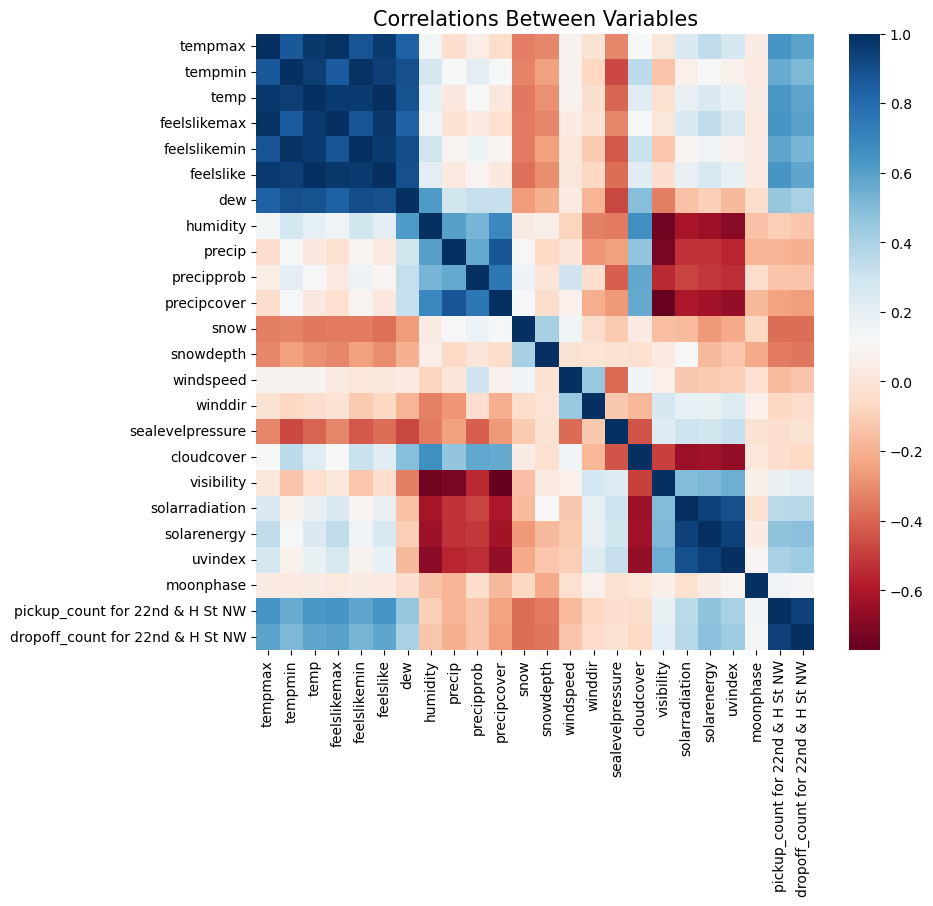

In [293]:
plt.figure(figsize=(9,8))
sns.heatmap(new_trip.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

# Models selections by comparing the performances between Linear, Ridge, LASSO, Elastic Net, KNN

## Linear Regression

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Pickup for 22nd St & H St NW

In [213]:
y = new_trip['pickup_count for 22nd & H St NW']
X = new_trip.drop(columns = ['pickup_count for 22nd & H St NW','dropoff_count for 22nd & H St NW'], axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0
3,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,0,...,88.1,9.9,145.6,5.3,4,0.09,0,0,1,0
4,35.8,24.9,29.8,26.4,16.7,20.0,15.3,56.2,0.118,100,...,58.4,8.4,180.5,6.7,5,0.14,0,0,1,0


In [214]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = random_seed)

In [215]:
#Features scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [216]:
# Train the model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)
y_pred = linear_regressor.predict(X_test_scaled)

In [217]:
print('The coefficients are:')
print(pd.Series(linear_regressor.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                    4.804601
tempmin                    9.105399
temp                      45.426986
feelslikemax              -4.000678
feelslikemin             -15.336806
feelslike                  9.084551
dew                      -52.015422
humidity                  23.496112
precip                     1.862831
precipprob                 1.044389
precipcover               -8.564134
snow                      -0.039047
snowdepth                 -2.816009
windspeed                 -2.473952
winddir                   -2.058766
sealevelpressure           1.391958
cloudcover                 1.075682
visibility                 1.859002
solarradiation            -1.635738
solarenergy                3.680834
uvindex                   -4.213778
moonphase                 -0.604439
icon_partly-cloudy-day     2.223661
icon_rain                  4.474122
icon_snow                  1.981369
icon_wind                  0.000000
dtype: float64


In [218]:
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 124.949


## LASSO

### Pickup for 22nd St & H St NW


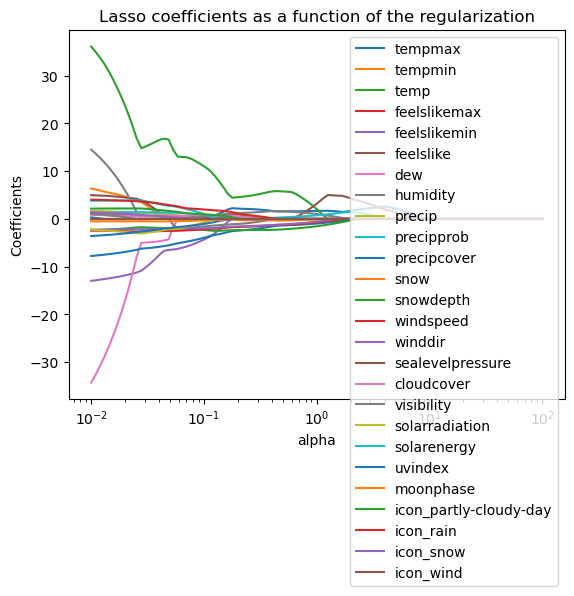

In [137]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [138]:
y_pred = lasso.predict(X_test_scaled)
mse = round(mean_squared_error(y_test, y_pred), 3)
print(f"MSE is {mse}")

MSE is 136.038


In [139]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(X_train_scaled, y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.7220809018385468


In [140]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train_scaled, y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   1.625655
tempmin                   0.000000
temp                      4.613510
feelslikemax              0.000000
feelslikemin              0.000000
feelslike                 0.916558
dew                       0.000000
humidity                 -0.000000
precip                   -0.000000
precipprob                0.000000
precipcover              -1.178581
snow                     -0.233365
snowdepth                -1.892003
windspeed                -1.024307
winddir                  -0.881559
sealevelpressure          0.000000
cloudcover                0.000000
visibility                1.355466
solarradiation            0.000000
solarenergy               0.522947
uvindex                   0.000000
moonphase                 0.000000
icon_partly-cloudy-day    0.000000
icon_rain                 0.000000
icon_snow                -0.000000
icon_wind                 0.000000
dtype: float64


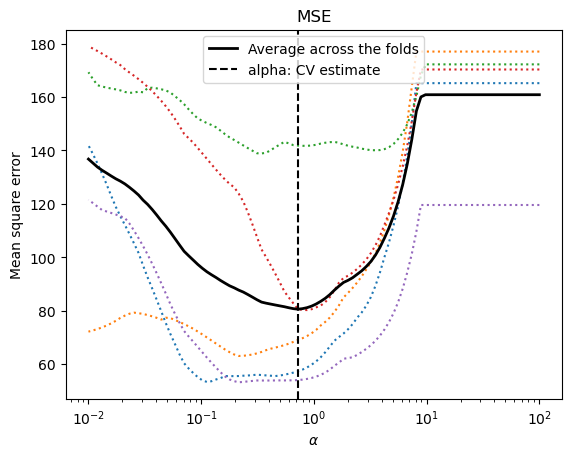

In [141]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [142]:
y_pred=lasso.predict(X_test_scaled)
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 82.112


## Ridge Regression

### Pickup for 22nd St & H St NW

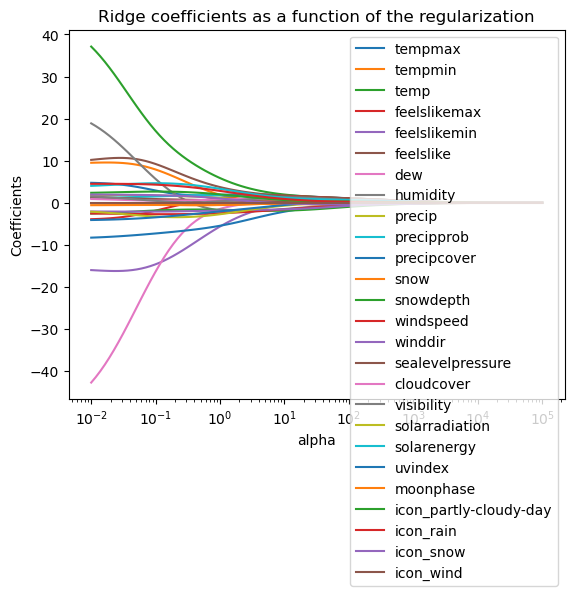

In [194]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization');

In [270]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(X_train_scaled, y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   0.399430
tempmin                   0.333546
temp                      0.394951
feelslikemax              0.395725
feelslikemin              0.341893
feelslike                 0.396992
dew                       0.278138
humidity                 -0.076191
precip                   -0.124425
precipprob               -0.053552
precipcover              -0.153733
snow                     -0.210849
snowdepth                -0.226579
windspeed                -0.109032
winddir                  -0.114626
sealevelpressure          0.016123
cloudcover               -0.003364
visibility                0.131404
solarradiation            0.183468
solarenergy               0.269172
uvindex                   0.203649
moonphase                 0.076695
icon_partly-cloudy-day    0.127168
icon_rain                 0.036953
icon_snow                -0.213089
icon_wind                 0.000000
dtype: float64


In [271]:
y_pred=ridge.predict(X_test_scaled)
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 97.752


In [272]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(X_train_scaled, y_train)
print('The best alpha from RidgeCV:',ridgecv.alpha_)

The best alpha from RidgeCV: 47.50810162102793


In [273]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(X_train_scaled, y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   1.283709
tempmin                   0.721288
temp                      1.253621
feelslikemax              1.264525
feelslikemin              0.643434
feelslike                 1.222245
dew                       0.581758
humidity                 -0.700259
precip                   -0.358975
precipprob                0.128528
precipcover              -0.876132
snow                     -0.394543
snowdepth                -1.330934
windspeed                -0.845968
winddir                  -1.054632
sealevelpressure          0.239863
cloudcover                0.358547
visibility                0.927236
solarradiation            0.027522
solarenergy               0.787054
uvindex                   0.194777
moonphase                 0.223432
icon_partly-cloudy-day    0.305521
icon_rain                 0.330793
icon_snow                -0.375798
icon_wind                 0.000000
dtype: float64


In [274]:
y_pred=ridge.predict(X_test_scaled)
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 77.804


## Elastic Net

### Pickup for 22st & H St NW

In [149]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(X_train_scaled, y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.48673041060238076


In [151]:
# with the best alpha
EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(X_train, y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   0.000000
tempmin                   0.272315
temp                      0.905896
feelslikemax             -0.000000
feelslikemin             -0.634968
feelslike                 0.602414
dew                      -0.451518
humidity                  0.000000
precip                    0.000000
precipprob                0.054391
precipcover              -0.233087
snow                     -0.000000
snowdepth                -0.633199
windspeed                -0.414490
winddir                  -0.019201
sealevelpressure          0.148060
cloudcover                0.035730
visibility                0.000000
solarradiation           -0.091576
solarenergy               0.959668
uvindex                  -0.362567
moonphase                -0.000000
icon_partly-cloudy-day    0.000000
icon_rain                 0.000000
icon_snow                -0.021268
icon_wind                 0.000000
dtype: float64


In [153]:
y_pred=EN.predict(X_test_scaled)
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 33399.551


## KNN

### Pickup for 22st & H St NW


In [154]:
from sklearn import neighbors

model = neighbors.KNeighborsRegressor(n_neighbors = 15)
model.fit(X_train_scaled, y_train)
# Training MSE
mean_squared_error(y_train, model.predict(X_train_scaled))

80.01784126984127

In [155]:
# Test MSE
mean_squared_error(y_test, model.predict(X_test_scaled))

87.56548463356974

In [157]:
mse_train = [-1]*30
mse_test = [-1]*30
for K in range(30):
    model = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model.fit(X_train_scaled, y_train)  #fit the model
    mse_train[K] = mean_squared_error(y_train, model.predict(X_train_scaled))
    mse_test[K] = mean_squared_error(y_test, model.predict(X_test_scaled))


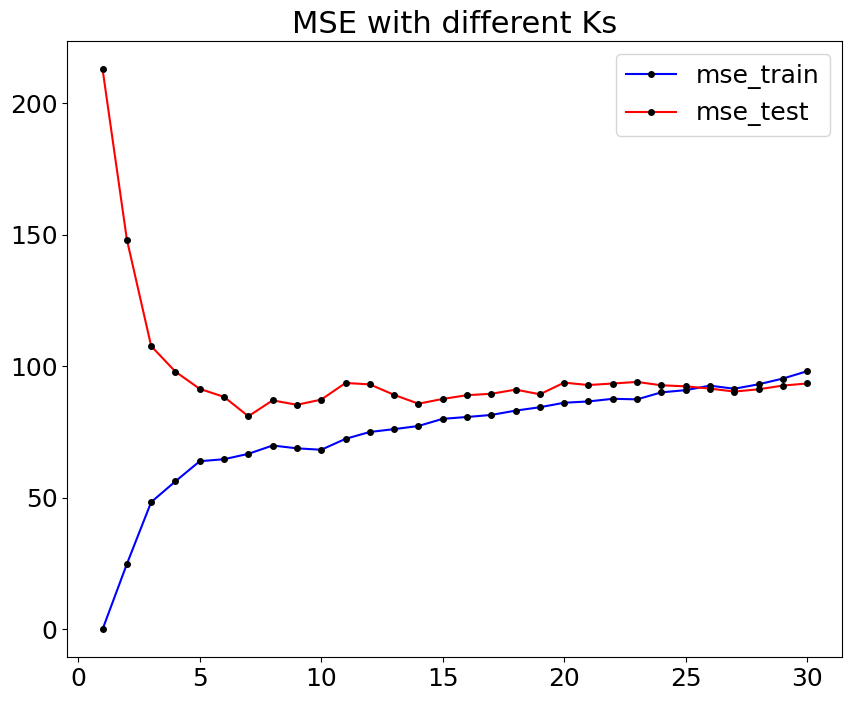

In [294]:
fig, ax1 = plt.subplots(figsize=(10,8))
plt.plot(np.arange(30)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(30)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=18)
plt.title('MSE with different Ks', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [159]:
# optimal k
np.argmin(mse_test)+1

7

In [161]:
# optimal MSE
min(mse_test)

80.99609205384282

# Model selection

## Based on the lowest MSE score, I will choose Ridge to perform the model

### Predict the first occurence of pick up using the test data for 22nd St & H St NW

In [282]:
# with the best alpha = 47
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(X_train_scaled, y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   1.283709
tempmin                   0.721288
temp                      1.253621
feelslikemax              1.264525
feelslikemin              0.643434
feelslike                 1.222245
dew                       0.581758
humidity                 -0.700259
precip                   -0.358975
precipprob                0.128528
precipcover              -0.876132
snow                     -0.394543
snowdepth                -1.330934
windspeed                -0.845968
winddir                  -1.054632
sealevelpressure          0.239863
cloudcover                0.358547
visibility                0.927236
solarradiation            0.027522
solarenergy               0.787054
uvindex                   0.194777
moonphase                 0.223432
icon_partly-cloudy-day    0.305521
icon_rain                 0.330793
icon_snow                -0.375798
icon_wind                 0.000000
dtype: float64


In [276]:
y_pred = ridge.predict(X_test_scaled[0].reshape(1, -1))
print(y_pred)

[18.48331407]


### Predict the first occurence of drop off using the test data for 22nd St & H St NW

In [277]:
y_drop = new_trip['dropoff_count for 22nd & H St NW']
X_drop = new_trip.drop(columns = ['pickup_count for 22nd & H St NW','dropoff_count for 22nd & H St NW'], axis=1)
X_drop = pd.get_dummies(data=X, drop_first=True)

In [278]:
X_train_drop,X_test_drop, y_train_drop,y_test_drop = train_test_split(X_drop,y_drop, test_size=0.4, random_state = 12)

In [279]:
#Features scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_drop)
X_train_drop_scaled = scaler.transform(X_train_drop)
X_test_drop_scaled = scaler.transform(X_test_drop)

In [280]:
# with the best alpha = 47
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(X_train_drop_scaled, y_train_drop)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train_drop.columns))

The coefficients are:
tempmax                   0.726011
tempmin                   0.431086
temp                      0.707687
feelslikemax              1.018731
feelslikemin              0.389754
feelslike                 0.768550
dew                       0.446402
humidity                 -0.157646
precip                   -1.011923
precipprob                0.289506
precipcover              -0.660995
snow                     -0.647114
snowdepth                -1.609202
windspeed                -1.254048
winddir                  -0.876510
sealevelpressure          0.120439
cloudcover                0.666167
visibility                0.790883
solarradiation           -0.045845
solarenergy               1.216968
uvindex                   1.067355
moonphase                 0.730417
icon_partly-cloudy-day    0.311178
icon_rain                 0.554244
icon_snow                -0.487508
icon_wind                 0.062052
dtype: float64


In [281]:
y_pred_drop = ridge.predict(X_test_drop_scaled[0].reshape(1, -1))
print(y_pred_drop)

[28.85864993]


# Conclusion

### The predicted number of drop-offs is greater than the predicted number of pick-ups at the bikeshare station near my school, suggesting that there might not be an immediate need for reallocation. On a given day, we can see that the UV index is positively related to pick-up times, implying that more people tend to use bikes when the UV index is higher. This may also raise concerns about sun exposure and potential risks of skin-related diseases. The negative relationship between windspeed and pick-up times suggests that bike demand decreases on windy days. This could be due to discomfort and safety concerns while riding in strong winds. The Bikeshare could strategically plan maintenance or repair activities for bikes and docks on forecasted windy days, maximizing efficiency while minimizing the impact on ridership.